## Introduction to Scikit-Learn(sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.
What we're going to cover:

# Let's listify the contents
## what were covering:- 
    0.An end to end scikit learn workflow.
    1.Getting the data ready
    2.Choose the right estimator /algorithm for our problems.
    3.Fit the model/aalgorithm and use it to make predictions on our data
    4.Evaluating a model
    5.Improve a model
    6.Save and load a trained model
    7.Putting it all together


## 0. An end to end scikit learn workflow

In [1]:
# 1. Get the data ready
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease=pd.read_csv("data/heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Create x (feature matrix)
x =heart_disease.drop("target",axis=1)
#Create y(labels)
y=heart_disease["target"]

In [3]:
#2.Choose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#we'll keep the default hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3.Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)


In [5]:
clf.fit(x_train, y_train);

In [6]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [7]:
#Make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds=clf.predict(x_test)
y_preds

In [ ]:
x_test

In [ ]:
#Evaluate the model on the training data and test data
clf.score(x_train, y_train)


In [ ]:
y_test

In [ ]:
#4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
#5. Improve a model
#Try diff amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with{i}estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")

In [ ]:
#6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

# 1. Getting the data ready to be used with machine learning
 Three main things we have to do:
    
    
    1. Split the data into features and labels (usually 'x' and 'y')
    
    2.Filling(also called imputing) or disregarding missing values
    
    3. Converting non-numerical values to numerical values (also called featuring coding)

In [8]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
x=heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
#Number of columns=13 and 242 is the 20% of the overall data
#242 is the 20% of 303

((242, 13), (61, 13), (242,), (61,))

In [13]:
x.shape

(303, 13)

In [14]:
len(heart_disease)

303

#Filling the data and converting data to numbers
### 1.1 Make sure its all numerical

In [15]:
car_sales=pd.read_csv("data/car_data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [16]:
len(car_sales)

10

In [17]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [18]:
car_sales["Price"]= car_sales["Price"].replace({'\$':''},regex=True)

In [19]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"4,000.00"
1,Honda,Red,87899,4,"5,000.00"
2,Toyota,Blue,32549,3,"7,000.00"
3,BMW,Black,11179,5,"22,000.00"
4,Nissan,White,213095,4,"3,500.00"
5,Toyota,Green,99213,4,"4,500.00"
6,Honda,Blue,45698,4,"7,500.00"
7,Honda,Blue,54738,4,"7,000.00"
8,Toyota,White,60000,4,"6,250.00"
9,Nissan,White,31600,4,"9,700.00"


In [20]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [21]:
car_sales['Price'] = car_sales['Price'].apply(clean_currency).astype('float')

In [22]:
car_sales["Price"].dtypes

dtype('float64')

In [23]:
# Split the data into x and y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

## Split into training training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                  y, test_size=0.2)



In [24]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [25]:
x

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [26]:
#Now to convert strings to float
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot , categorical_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x
# OneHotEncoding= this convert colours to numbers 

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [27]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [28]:
# one more way to do this
dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [29]:
# Lets refit the model
np.random.seed(100)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, 
                                                   test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.104352

### 1.2 What if there were missing values?

1. Fill them with some values ( also known as imputation).

2. Remove the samples with missing data altogether.

In [30]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
# This will tell how many missing values there are:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [33]:
# Create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [34]:
#Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot , categorical_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [35]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with pandas

In [36]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


In [37]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [40]:
len(car_sales_missing)

950

In [41]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [42]:
#Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot , categorical_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing data with scikit-learn

In [43]:
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# Split the data into x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [47]:
# Fill the missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer(something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer , cat_features), ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [48]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make","Colours","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colours,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [49]:
car_sales_filled.isna().sum()

Make             0
Colours          0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
# Convert these into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colours","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot , categorical_features)],
                              remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [51]:
# Now we got our data as numbers and filled (no missing values)
# Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model  = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [52]:
len(car_sales_filled), len(car_sales)

(950, 10)

# 2. Choosing the right estimator/algorithm for our problem

Sckit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another(Heart disease- whether a patient has it or not)

* Regression - predicting a number(Car sales to predict the price)

Step 1 - Check the Scikit-Learn machine-learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking the machine learning model for a regression problem

In [53]:

# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [54]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
# How many samples/
len(boston_df)

506

In [56]:
# Lets try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup a random seed

np.random.seed(42)

#Create the data

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#  Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [57]:
# Lets try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#  Instantiate RandomForest Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

# Check the score of the  model on test data
rf.score(x_test,y_test)

0.8654448653350507

In [58]:
# Check the Ridge model again
model.score(x_test, y_test)

0.6662221670168522

## 2.2 Choosing an estimator for a classification problem

Lets go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [59]:
heart_disease = pd.read_csv("data/heart.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try linear svc

In [60]:

# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC 

# Setup random seed
np.random.seed(42)

# Make the data

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
model = LinearSVC(max_iter=10000)
model.fit(x_train, y_train)

# Evaluate our LinearSVC
model.score(x_test, y_test)

C:\Users\Rohilla\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.71900826446281

In [61]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [62]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed
np.random.seed(42)

# Make the data

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Evaluate our RandomForestClassifier
model.score(x_test, y_test)

0.7892561983471075

Tidbit:
    
    1. if u have structured data use ensemble methods(heart_disease or any other csv file)
    
    2. if u have unstructured data use deep learning or transfer learning(file and images etc.)
    

There are mainly two types of data: 1. Classification and 2. Regression
Fundamentally, classification is about predicting a label and regression is about predicting a quantity.

## 3. Fitting the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

Different names for:
    
* x = features, features variables, data

* y = labels, targets, target variables

In [63]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed
np.random.seed(42)

# Make the data

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
# Fit the model to the data(training the machine learning model)
model.fit(x_train, y_train)

# Evaluate our RandomForestClassifier(use the patterns the model has learned)
model.score(x_test, y_test)

0.7892561983471075

In [64]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [65]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [66]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using Machine Learning Model

2 ways to make predictions :
    
1. predict()
2. predict_proba()

In [67]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,3,4]))# this does't work 

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [69]:
clf.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [70]:
np.array(y_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [71]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9628099173553719

In [72]:
clf.score(x_test, y_test)

0.9628099173553719

In [73]:
# Another way to do it
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9628099173553719

Make predictions with predict_proba()

In [74]:
#predict_proba() returms possibilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.02, 0.98],
       [0.87, 0.13],
       [0.69, 0.31],
       [0.01, 0.99],
       [0.94, 0.06]])

In [75]:
# Lets predict on the same data
clf.predict(x_test[:5])

array([1, 0, 0, 1, 0], dtype=int64)

predict proba have 2 numbers nut predict have only 1 number in the array, the value on the right is biger in case of 1 and the value of left is bigger in case of 0.
so this is making predictions on the same data but instead of just returning the label(0,1,1,0) its returning the probability of that label being true.


In [76]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

so we got 1 for heart disease and 0 for not having heart disease so what the proba is doing that hey i am looking for first five rows of 
these so proba divide 0 into 0.89 and 0.11 as 0 is bigger in this so this is saying that there is 0.89 probabilty of the first label
to be zero. or 0.68 probability of being label 0 in the second array.

its helpul to know whether our model is good or not or its making good predictions or not it have to be 0.90

'predict()' can also be used for regression model

In [77]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and testing
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(x_train, y_train)

# Make predictions 
y_preds = model.predict(x_test)

In [79]:
y_preds[:10]

array([10.586, 21.732, 24.431, 14.221, 20.373, 25.263, 23.811, 25.121,
       10.964, 15.739])

In [80]:
np.array(y_test[:10])

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5])

In [81]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.876400990099011

This is the average difference between the predictions and the truth

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators :

1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metric functions

#### 4.1 Evaluating the model with the 'score' method

In [82]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train, y_train)


RandomForestClassifier()

In [83]:
clf.score(x_train, y_train)

1.0

In [84]:
clf.score(x_test, y_test)

0.8524590163934426

Lets do the same but for regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and testing
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(x_train, y_train)

In [86]:
model.score(x_test, y_test)

0.8234340729453582

when we use regressor model the score function is doing different work than the classification model

### 4.2 Evaluating a model using the scoring parameter

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train, y_train);



In [88]:
clf.score(x_test, y_test)

0.8524590163934426

In [89]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

what is cross-validation(in the notebook)

In [90]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [91]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

when do we use 5-fold cross validation
We can change the scoring parameter in this

and the default value is none in this scoring 

In [92]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_test, y_test)

0.8524590163934426

In [93]:
# Scoring parameter set to none by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [94]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)


In [96]:
np.mean(cross_val_score)

0.8248087431693989

In [97]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


**Area under the receiver operating characteristics curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC are a comparison of a model's true positive rate(tpr) vs the model's false positive rate (fpr).

* True positive =  model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [98]:
# Create x_test....etc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [99]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [100]:
y_probs_positive  = y_probs[:, 1]
y_probs_positive[:10] #Right hand side arrays are called positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [101]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

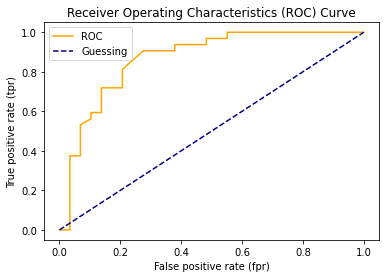

In [102]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr) of a model.."""
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customizing the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

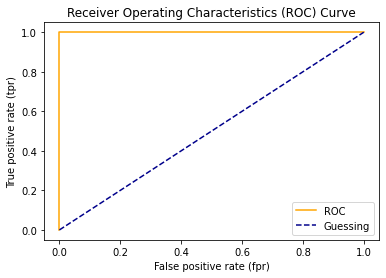

In [104]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [105]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the lables a model predicts and the actual labels it was supposed to predict.

In essence, giving u the idea of where the model is getting confused 

In [106]:
from sklearn.metrics import confusion_matrix

clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [107]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Lable"],
           colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Lable,,
0,24,5
1,8,24


In [108]:
22+7+8+24

61

In [109]:
len(x_test)

61

true positive and true negative are on the diagonals.

<AxesSubplot:>

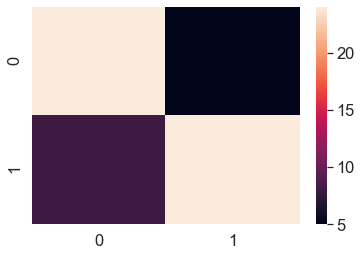

In [110]:
# Make our confusion matrix more visual with Seaborn's heatmap

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

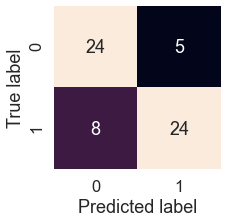

In [111]:
# Putting numbers in seaborn or add some more information in it

def plot_conf_mat(conf_mat):
    """
    Plots a confusion marix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    
plot_conf_mat(conf_mat)


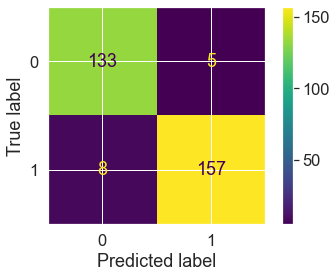

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y);

**Classification Report**

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



If the precision, recall and f1 score is 1.0 this means that there is no false positives or false negatives in the model

Lets see the example when we r using these matrices aother than accuracy

In [114]:
# Where precision and recall became valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only 1 positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Rohilla\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohilla\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohilla\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all the classes are balanced(e.g. same amount of samples which are labelled with 0 or 1).
* **Precsion** and **recall** became more important when classes are imbalanced.
* if false positive are worse than false negatives, aim for higher precision.
* if false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation...https://scikit-learn.org/stable/modules/model_evaluation.html
    
1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error(MSE)

**R^2**

What R^2 does = Compares your model predictions to the mean of the targets. Values can range from negative infinity (a very poor model)to 1.
for example, if all your model does is predict the mean of the targets its R^2 value would be zero but if your model perfectly 
predicts a range of numbers its a R^2 value would be 1

In [127]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train);

In [128]:
model.score(x_test, y_test)

0.8654448653350507

In [132]:
from sklearn.metrics import r2_score 

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [133]:
y_test.mean()

21.488235294117644

In [136]:
# Model only predicting the mean gets the R^2 score of 0 
r2_score(y_test, y_test_mean)

0.0

In [137]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute diiferences between predictions and actual values. it gives you an idea of how wrong your model predictions are

In [139]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)

In [140]:
mae

2.136382352941176

In [143]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [ ]:
***MSE(Mean squared error)***


In [144]:
# Mean square error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)

In [145]:
mse

9.867437068627442

In [146]:
# Calculate MSE by hand
squared = np.square(df["differences"])


In [148]:
squared.mean()

9.867437068627442